In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from  matplotlib.colors import LinearSegmentedColormap
from scipy.stats import norm

In [2]:
df = yf.Ticker('^GSPC').history(period="max")
df = df[df.index > pd.to_datetime('1950-01-01')]

In [3]:
y = df['Close'].apply(np.log)

X = np.vstack([np.arange(len(df.index)), np.ones(len(df.index))]).T

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)

In [4]:
diff = df['Close'].rolling(50).mean().apply(np.log) - y_pred

df['indicator'] = norm.cdf((diff - diff.mean()) / diff.std())

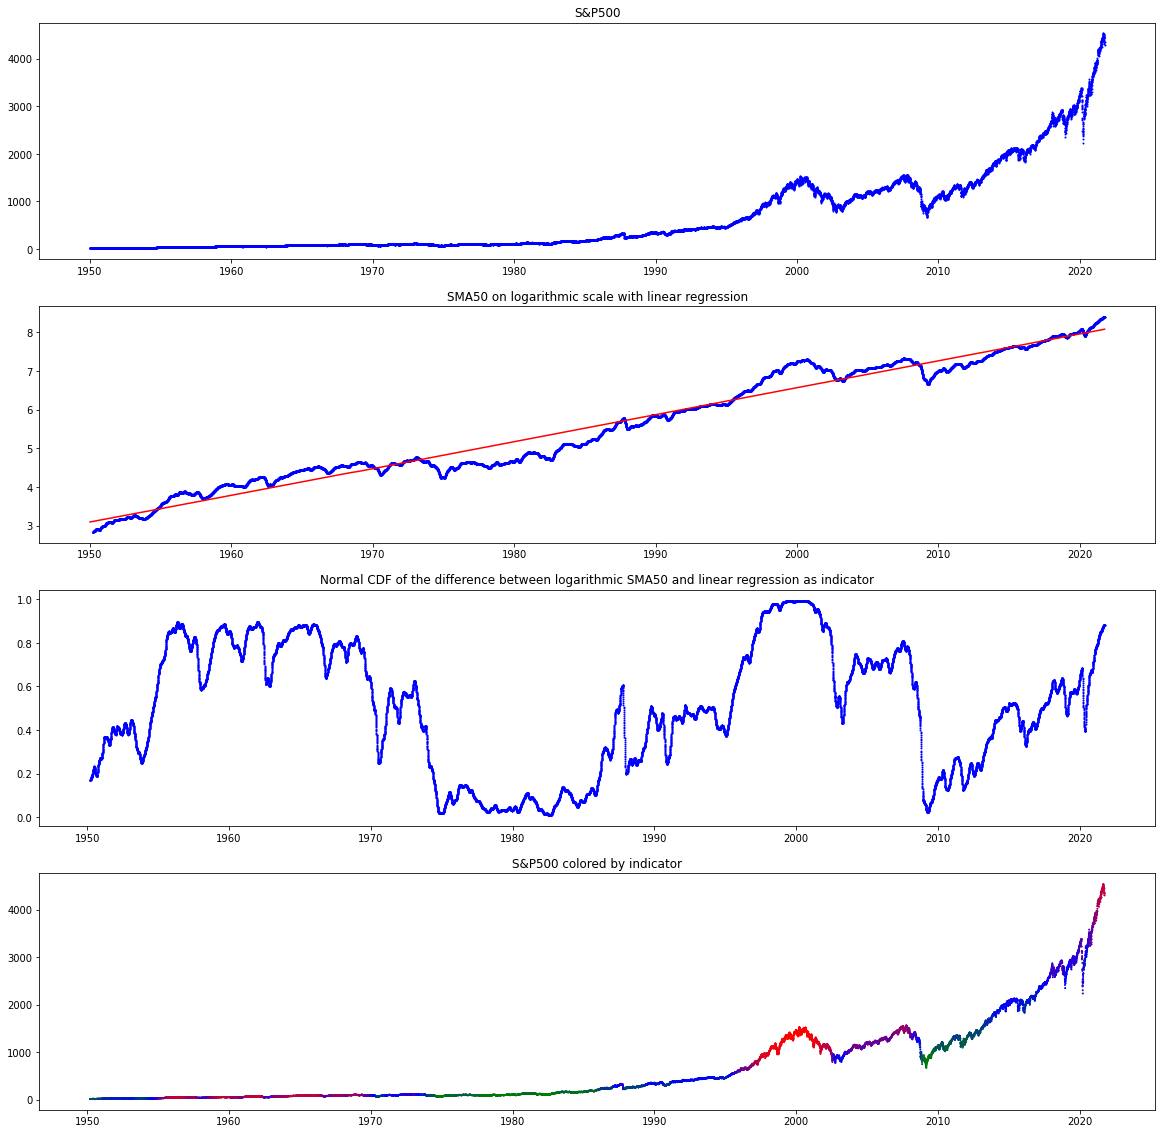

In [5]:
cmap=LinearSegmentedColormap.from_list('gbr',["g", "b", "r"], N=256) 

fig, axs = plt.subplots(4, 1, figsize=(20, 20))

axs[0].set_title('S&P500')
axs[0].scatter(df.index, df['Close'], s=1, c='b')

axs[1].set_title('SMA50 on logarithmic scale with linear regression')
axs[1].scatter(df.index, df['Close'].rolling(50).mean().apply(np.log), s=1, c = 'b')
axs[1].plot(df.index, y_pred, c='r')

axs[2].set_title('Normal CDF of the difference between logarithmic SMA50 and linear regression as indicator')
axs[2].scatter(df.index, df['indicator'], s=1, c = 'b')

axs[3].set_title('S&P500 colored by indicator')
axs[3].scatter(df.index, df['Close'], c = df['indicator'], s=1, cmap=cmap)

In [6]:
fig.savefig('indicator.png')